## Natural Language Processing for Amazon Alexa Reviews

By Priyanka Bandekar (NUID: 001055485)

Dataset imported from the Kaggle (https://www.kaggle.com/sid321axn/amazon-alexa-reviews)

### **Abstract :**

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.

We will use this data to analyze Amazon’s Alexa product ; discover insights into consumer reviews and assist with machine learning models. We will also train our machine models for sentiment analysis and analyze customer reviews on how many positive or negative reviews there are about this product.

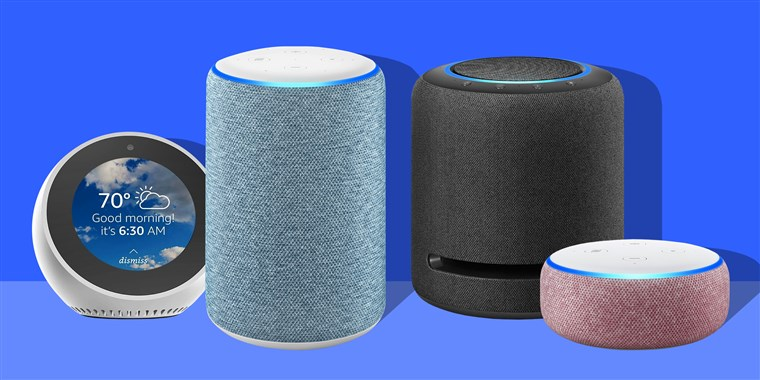

### **Summary :**

Natural Language Processing (NLP) is a field where we process linguistic data so that it can be imterpreted by a computer. Various devices these days such as Amazon Alexa, Apple's Siri or the Google Home by Google etc. use NLP to interact with humans by taking in verbal inputs to interpret text data. Machines use information in a numeric form which is different than linguistic data and hence this task is not easy and requires a complex solution.

In this project, we will be using NLP to predict the user-given rating of a product, in this case Amazon Alexa in her various forms, based on the review text. 

**Some of the concepts that we will be using further explained below:**



**NLP with spaCy**

spaCy is the leading library for NLP, and it has quickly become one of the most popular Python frameworks. Most people find it intuitive, and it has excellent documentation.

spaCy relies on models that are language-specific and come in different sizes. You can load a spaCy model with spacy.load.

For example, here's how you would load the English language model.

In [143]:
import spacy
nlp = spacy.load('en')

In [147]:
doc = nlp("COVID-19 cases are on a rise in Boston, aren't they?")

### **Tokenizing**
This returns a document object that contains tokens. A token is a unit of text in the document, such as individual words and punctuation. SpaCy splits contractions like "don't" into two tokens, "do" and "n't". You can see the tokens by iterating through the document.


Iterating through a document gives you token objects. Each of these tokens comes with additional information. In most cases, the important ones are token.lemma_ and token.is_stop.

In [148]:
for token in doc:
    print(token)

COVID-19
cases
are
on
a
rise
in
Boston
,
are
n't
they
?


### **Text preprocessing**
There are a few types of preprocessing to improve how we model with words. The first is "lemmatizing." The "lemma" of a word is its base form. For example, "walk" is the lemma of the word "walking". So, when you lemmatize the word walking, you would convert it to walk.

It's also common to remove stopwords. Stopwords are words that occur frequently in the language and don't contain much information. English stopwords include "the", "is", "and", "but", "not".

With a spaCy token, token.lemma_ returns the lemma, while token.is_stop returns a boolean True if the token is a stopword (and False otherwise).

In [149]:
print(f"Token \t\tLemma \t\tStopword".format('Token', 'Lemma', 'Stopword'))
print("-"*40)
for token in doc:
    print(f"{str(token)}\t\t{token.lemma_}\t\t{token.is_stop}")

Token 		Lemma 		Stopword
----------------------------------------
COVID-19		covid-19		False
cases		case		False
are		be		True
on		on		True
a		a		True
rise		rise		False
in		in		True
Boston		Boston		False
,		,		False
are		be		True
n't		not		True
they		-PRON-		True
?		?		False


## **Let us Start with our Project Now!**

**Importing some Basic Libraries**

In [ ]:
from google.colab import files
files.upload()

Saving amazon_alexa.tsv to amazon_alexa.tsv


{'amazon_alexa.tsv': b'\xef\xbb\xbfrating\tdate\tvariation\tverified_reviews\tfeedback\r\n5\t31-Jul-18\tCharcoal Fabric \tLove my Echo!\t1\r\n5\t31-Jul-18\tCharcoal Fabric \tLoved it!\t1\r\n4\t31-Jul-18\tWalnut Finish \t"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home."\t1\r\n5\t31-Jul-18\tCharcoal Fabric \t"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."\t1\r\n5\t31-Jul-18\tCharcoal Fabric \tMusic\t1\r\n5\t31-Jul-18\tHeather Gray Fabric \t"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can\xe2\x80\x99t wait to see what else it can do."\t1\r\n3\t31-Jul-18\tSandstone Fabric \t"Without having a cellphone, I cannot use many of her feat

In [25]:
# Importing the libraries 

import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# For advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff



### **Data Exploration**

**Reading the data**

In [42]:
# Reads a file into a dataframe

data = pd.read_table("amazon_alexa.tsv")

In [43]:
# Getting the shape of the data

data.shape

(3150, 5)

In [44]:
# Will Retun the first n rows of the data

data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [45]:
# Describing the data set

data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [46]:
# Checking if there is any null data 

data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

**Describing the data according to the Length of the reviews**

In [47]:
# Adding a length column for analyzing the length of the reviews

data['length'] = data['verified_reviews'].apply(len)

data.groupby('length').describe().sample(10)

rating                                 ... feedback                      
        count      mean       std  min   25%  ...      min   25%  50%   75%  max
length                                        ...                               
204       3.0  5.000000  0.000000  5.0  5.00  ...      1.0  1.00  1.0  1.00  1.0
646       1.0  5.000000       NaN  5.0  5.00  ...      1.0  1.00  1.0  1.00  1.0
285       2.0  4.500000  0.707107  4.0  4.25  ...      1.0  1.00  1.0  1.00  1.0
28        7.0  4.857143  0.377964  4.0  5.00  ...      1.0  1.00  1.0  1.00  1.0
270       5.0  4.400000  0.547723  4.0  4.00  ...      1.0  1.00  1.0  1.00  1.0
668       1.0  4.000000       NaN  4.0  4.00  ...      1.0  1.00  1.0  1.00  1.0
690       1.0  3.000000       NaN  3.0  3.00  ...      1.0  1.00  1.0  1.00  1.0
113       7.0  4.428571  1.511858  1.0  5.00  ...      0.0  1.00  1.0  1.00  1.0
375       2.0  3.000000  2.828427  1.0  2.00  ...      0.0  0.25  0.5  0.75  1.0
60       18.0  4.722222  0.669113  3.0  5.00  ...      1.0  1.00  1.0  1.00  1.0

[10 rows x 16 columns]

**Describing the data according to the ratings**

In [48]:
data.groupby('rating').describe()

feedback                      ... length                              
          count mean  std  min  25%  ...    min    25%    50%     75%     max
rating                               ...                                     
1         161.0  0.0  0.0  0.0  0.0  ...    1.0  36.00  120.0  284.00  1124.0
2          96.0  0.0  0.0  0.0  0.0  ...    1.0  78.75  163.0  309.25  1686.0
3         152.0  1.0  0.0  1.0  1.0  ...    1.0  54.00  130.0  284.00  1954.0
4         455.0  1.0  0.0  1.0  1.0  ...    1.0  34.00   99.0  241.00  1360.0
5        2286.0  1.0  0.0  1.0  1.0  ...    1.0  26.00   64.0  135.00  2851.0

[5 rows x 16 columns]

**Describing the data according to the feedback**

In [49]:
data.groupby('feedback').describe()

rating                                ... length                            
           count      mean       std  min  25%  ...    min   25%    50%    75%     max
feedback                                        ...                                   
0          257.0  1.373541  0.484688  1.0  1.0  ...    1.0  53.0  137.0  289.0  1686.0
1         2893.0  4.737643  0.546544  3.0  5.0  ...    1.0  29.0   69.0  154.0  2851.0

[2 rows x 16 columns]

## Data Visualizations

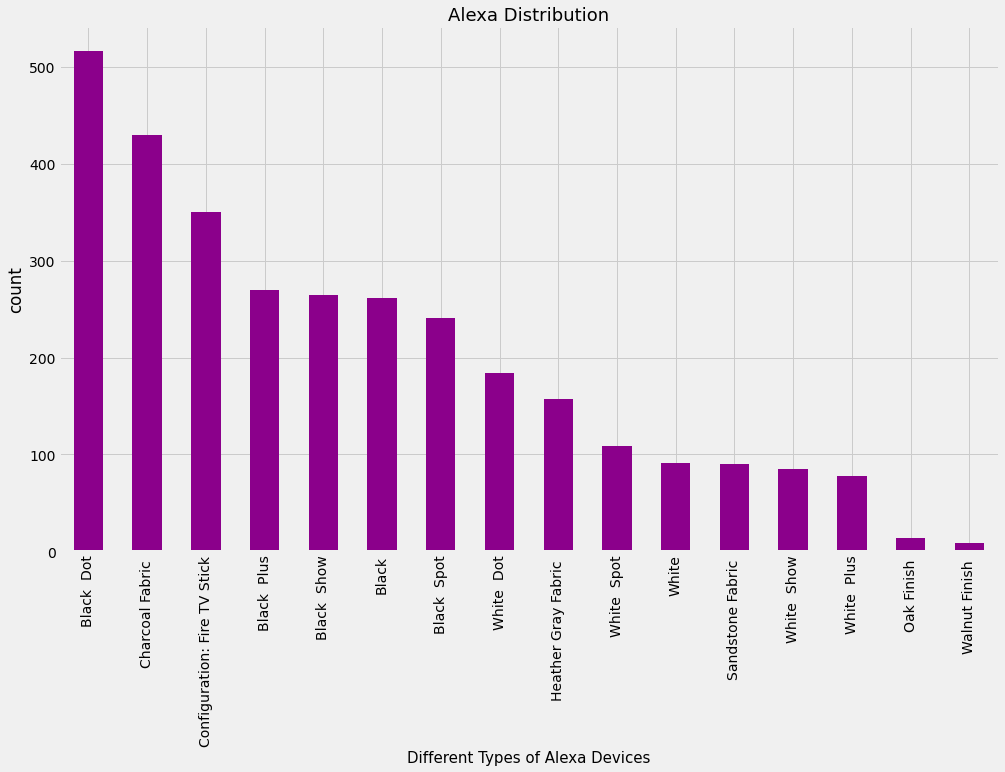

In [155]:
# Variations of Alexa devices based on different devices and their counts


data['variation'].value_counts().plot.bar(color = 'darkmagenta', figsize = (15, 9))
plt.title('Alexa Distribution', size = 18)
plt.xlabel('Different Types of Alexa Devices',size=15)
plt.ylabel('count')
plt.show()



In the bar plot above, we see the plots for different types of Amazon Alexa devices with their popularity (counts). We see that the **Black Echo Dot**
is the most **popular** one amongst all the others Alexa devices which accounts to around 500 Black Dots out of the total Alexa devices.


**Charcoal Fabric** and **Configuration: Fire TV Stick** are number 2 and number 3 behind the Black Dot.

We also see that **Oak Finish** and **Walnut Finish** are the most **unpopular** ones with around 10 counts each.

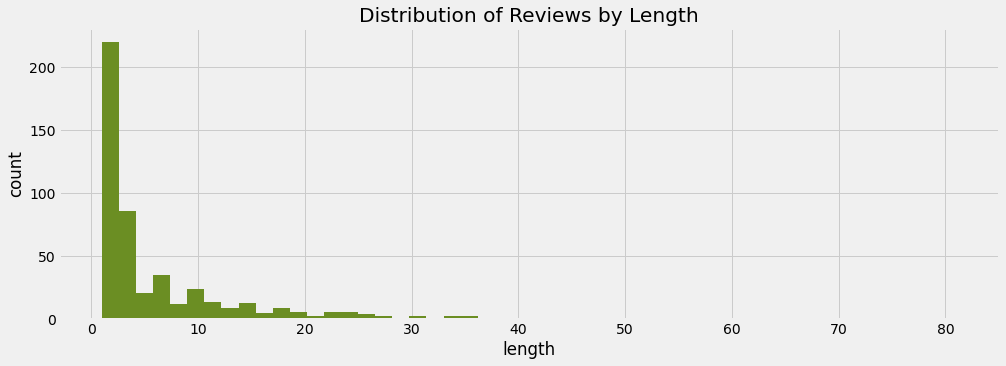

In [75]:
# Distribution of length in Reviews

data['length'].value_counts().plot.hist(color = 'olivedrab', figsize = (15, 5), bins = 50)
plt.title('Distribution of Reviews by Length')
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In the distribution plot above, we see that the distribution of the length of  various reviews written by people about the Alexa. 

We see that on an average, the length of the reviews written by customers for Alexa and mosy of the reviews are short in length and they are just two to three word long. We analyzed that most customers write reviews with 5-20 words. 

Very few customers write long reviews that are 70-80 words.



**Some of the reviews according to thier lengths**

In [76]:
# iloc is the integer-location based indexing for selection by position.

data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [77]:
data[data['length'] == 21]['verified_reviews'].iloc[0]

'Good sound works well'

In [78]:
data[data['length'] == 50]['verified_reviews'].iloc[0]

'Yet another Exho for our home and love them all!!!'

In [79]:
data[data['length'] == 150]['verified_reviews'].iloc[0]

"Got this on Amazon prime with the ring pro. Work really great. Being the lazy guy I am I don't need to go see who at my door anymore while I'm gaming."

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



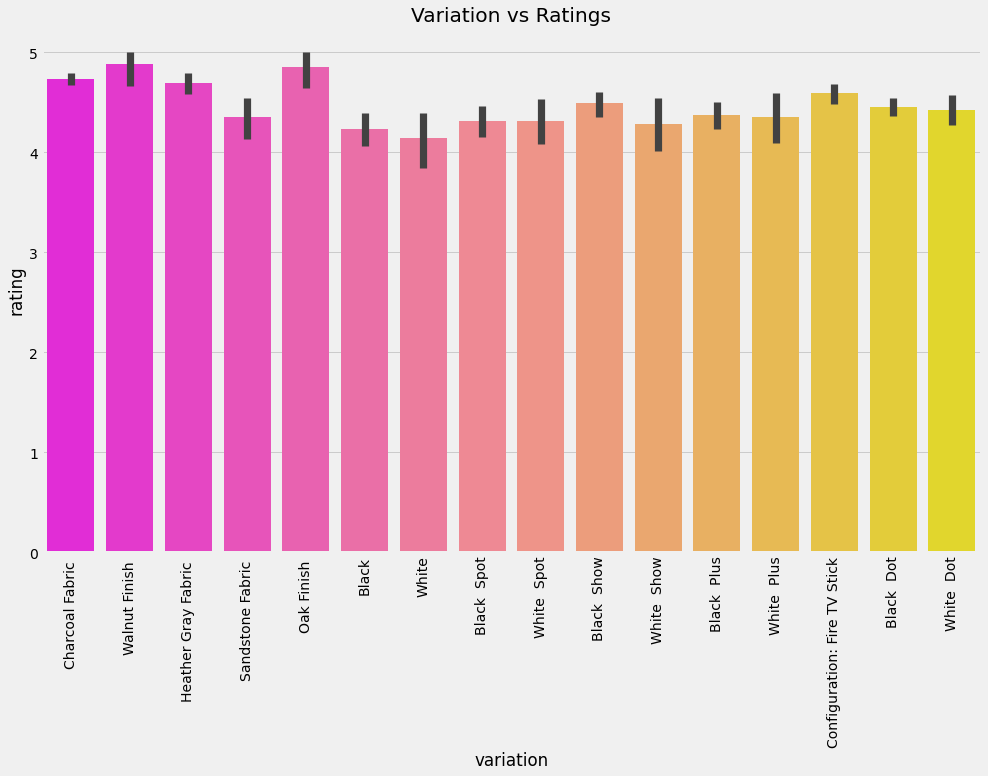

In [91]:
# Variation versus Ratings 

plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('fivethirtyeight')
sns.barplot(data['variation'], data['rating'], palette = 'spring')
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

The plot above plots the Variation Vs Ratings and checks which of the variations of Amazon Alexa performs the best when it comes to the Ratings.

We see that Walnut Finish and Oak Finish have the highest ratings, and they range from 4.5 to 5.

Amazon Alexa with White and Black variations have low rating and it is the most common variation and that is why the ratings are from 0 to 5.




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

49.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

7.1% of the points cannot be placed; you may wa

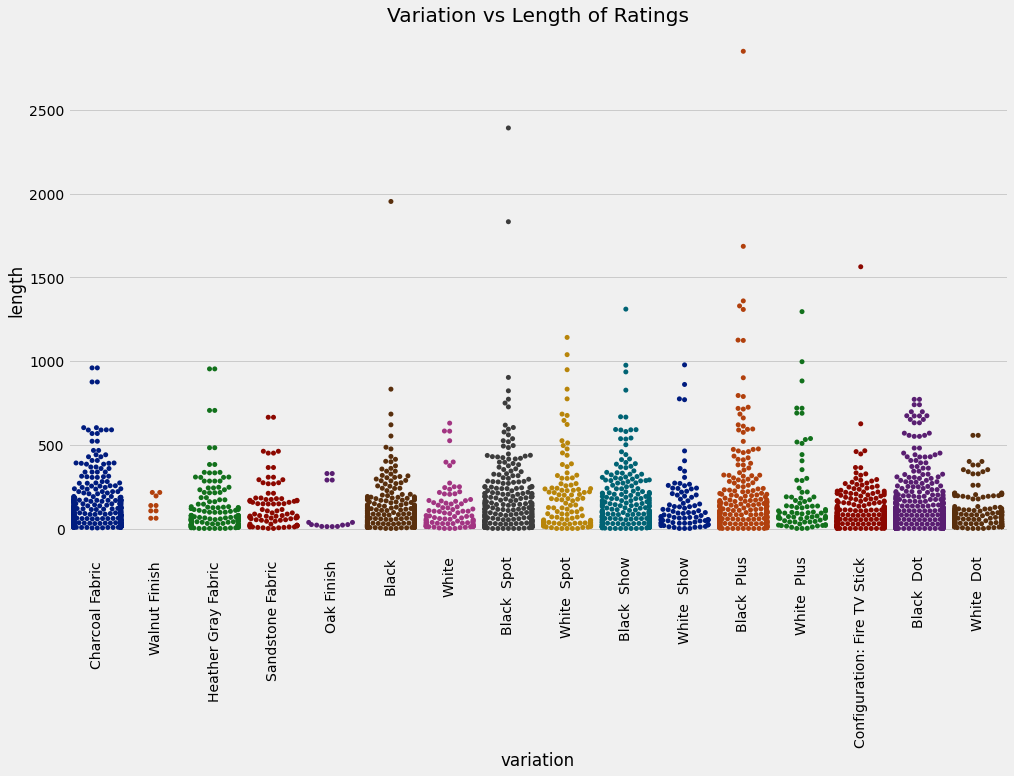

In [96]:
# Variation Vs Length of Ratings

plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('fivethirtyeight')

sns.swarmplot(data['variation'], data['length'], palette = 'dark')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation = 90)
plt.show()

In the plot above, the swarmplot between the different variations of Amazon Alexa and Length of Reviews are seen. We see that for which variations we have the longest reviews. 

By observation, we see that the longest review was for the 'Black Plus' which is shown in color brown. 

'Black Spot' has two long reviews.

So, the conclusion here is that the longest reviews were for the Black color ALexa models.


.

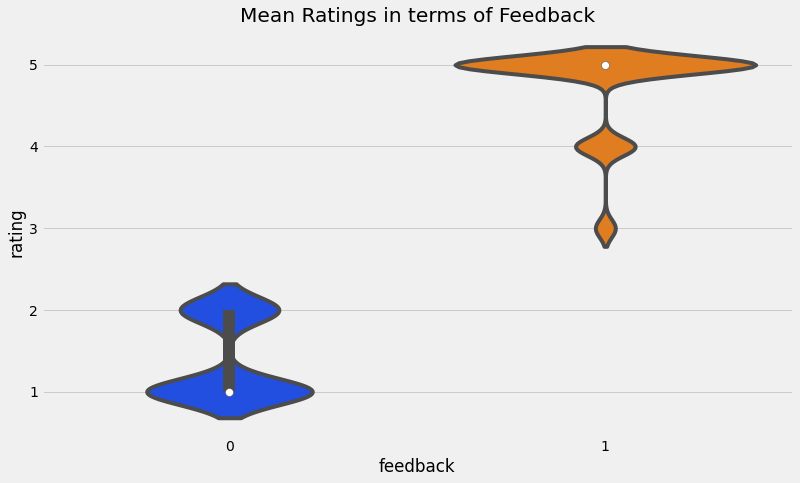

In [105]:
import warnings
warnings.filterwarnings('ignore')

#plt.rcParams['figure.figsize'] = (12, 7)
#plt.style.use('fivethirtyeight')

sns.violinplot(data['feedback'], data['rating'], palette = 'bright')
plt.title("Mean Ratings in terms of Feedback")
plt.show()

The above plot shows a boxplot between Feedback and the Ratings. We see that the products which have 0 feedback has a lower ratinngs ranging from 1 to 2 and the products that have value 1 have a rating from 3 to 5.



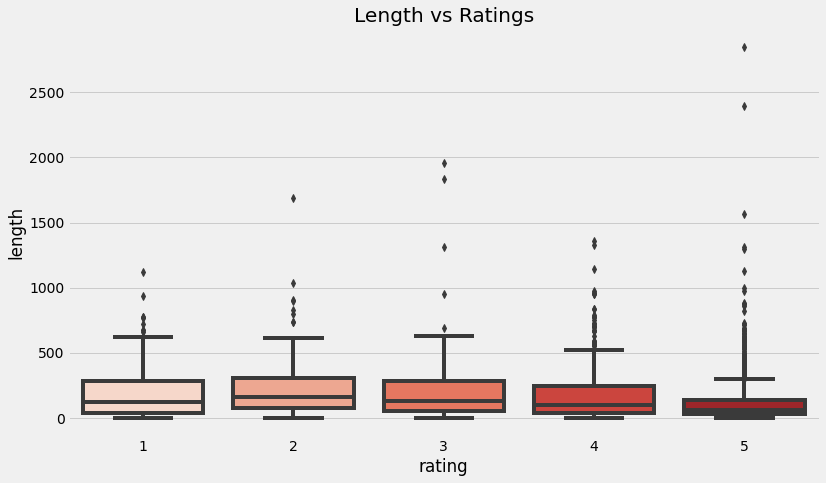

In [111]:
# Length Vs Ratings

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
#plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'Reds')
plt.title("Length vs Ratings")
plt.show()

The above Bivariate plot shows a plot between Rating and Length, We would like to see that how much a user is going to write if they are going to give a low rating or a high rating to the product.

We can see that most of the people who gave a rating of 5 to Alexa wrote a very small review and compared to the people  who did not give alexa a 5 star rating. But, the longest reviews were only given to 5 star ratings.

The people who gave alexa, a low rating such as 1 or 2 star rating did not consider writing a longer review maybe because they do not like the product.

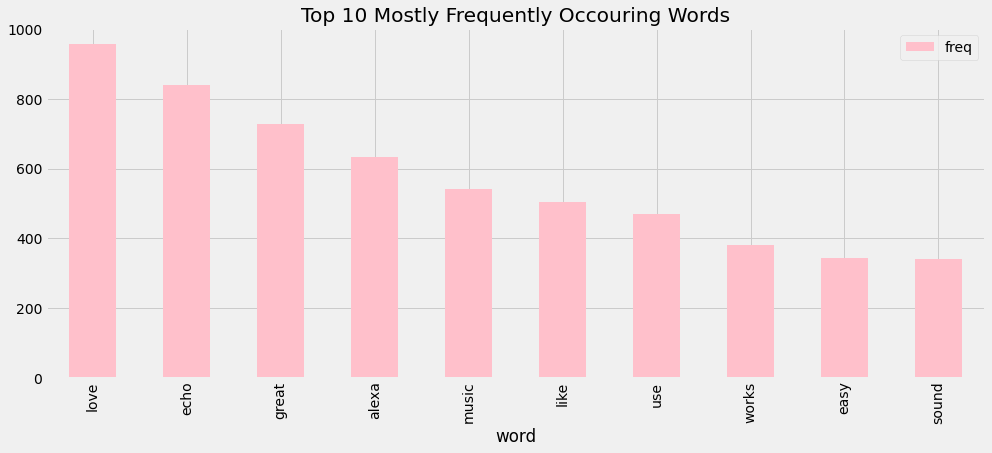

In [114]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = 'pink')
plt.title("Top 10 Mostly Frequently Occouring Words")
plt.show()

The Barplot above represents the most used words in the Alexa Reviews and we get an estimate of how the people think of the Alexa device.

We see that 'love' is the most frequently used word meaning that all these people love their experience with Alexa. Other top words are 'great', 'like',
'works', 'easy'. 
=

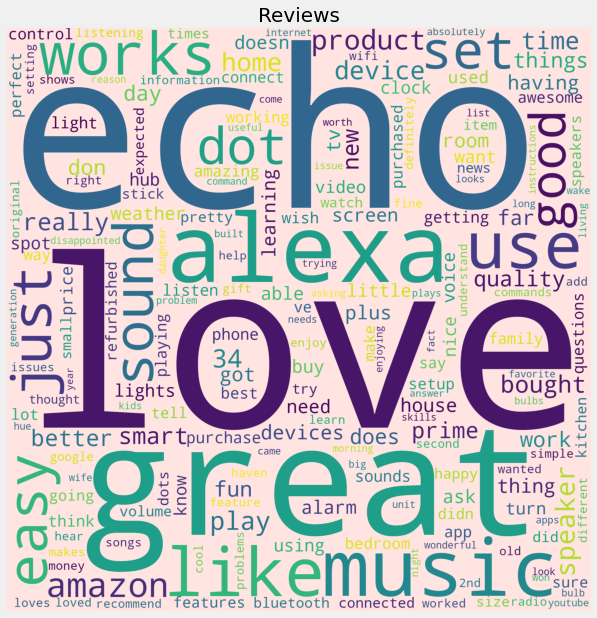

In [118]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'mistyrose', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Reviews", fontsize = 20)
plt.show()

Plotting a wordscloud for the Words to see all the words, The Larger the words the larger is the frequency for that word. 

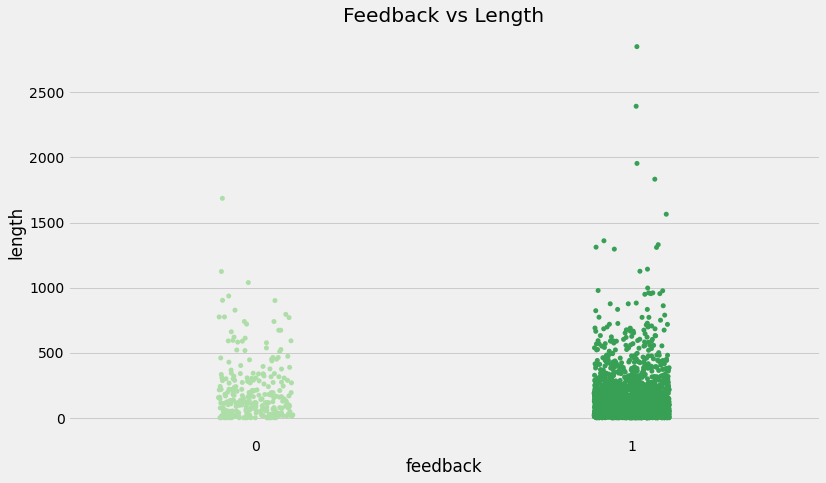

In [124]:
# Feedback vs Length

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
sns.stripplot(data['feedback'], data['length'], palette = 'Greens')
plt.title("Feedback vs Length")
plt.show()

### **Spacy**

spaCy is the leading library for NLP, and it has quickly become one of the most popular Python frameworks. Most people find it intuitive, and it has excellent documentation.

spaCy relies on models that are language-specific and come in different sizes. We can load a spaCy model with spacy.load.

In [126]:
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = data['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)


In [127]:
# Cleaning the texts
# Importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [128]:
# Text Preprocessing, Applying Stopwords

corpus = []

for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
 

In [129]:
# Creating Bag of words

from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features = 2500)



In [130]:
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [131]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [132]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


## Modelling

**Random Forest**

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9365079365079365
[[ 22  53]
 [  7 863]]


In [134]:
# Applying K fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9369724393253804
Standard Variance : 0.011110783503260648


In [135]:
# Hyperparameter tuning for Random Forest

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}


In [136]:
# Applying Grid search with Stratified folds

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_object = StratifiedKFold(n_splits = 2)

grid = GridSearchCV(estimator = model, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                         

In [137]:
# Printing the best combination of Parameter

print("Best Parameter Combination : {}".format(grid.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [152]:

print("Mean Cross Validation Accuracy for the Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("Mean Cross Validation Accuracy for the Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

from sklearn.metrics import accuracy_score
print("Test Set - Accuracy Score:", accuracy_score(y_test, y_pred))

Mean Cross Validation Accuracy for the Train Set : 96.9503235689499
Mean Cross Validation Accuracy for the Validation Set : 92.34113714782157
Test Set - Accuracy Score: 0.9365079365079365


### **Conclusion:** 


We started with Reading the data for the Alexa Reviews, Describing the data for various measures, Visualizing some data, Analyzing some of the Reviews based on their lengths, Determining the most Frequently used words, Visualized a Wordcloud for the Reviews, Used Spacy, Used Random Forest algorithm to model the data and performed Cross Validation.


### **Citations :**



1.   Matleonard. (2020, October 01). Intro to NLP. Retrieved November 01, 2020, from https://www.kaggle.com/matleonard/intro-to-nlp
2.  Matleonard. (2020, October 01). Text Classification. Retrieved November 01, 2020, from https://www.kaggle.com/matleonard/text-classification
3. Cunningham, A. (2019, January 08). A Quick Exploration of NLP for text Classification on Echo Reviews. Retrieved November 01, 2020, from https://towardsdatascience.com/a-quick-exploration-of-nlp-for-text-classification-on-echo-reviews-6b65a9e2cc9e
4. List of named colors¶. (n.d.). Retrieved November 01, 2020, from https://matplotlib.org/3.1.0/gallery/color/named_colors.html
5. Shetty, B. (2018, November 24). Natural Language Processing(NLP) for Machine Learning. Retrieved November 01, 2020, from https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b
6. Tosik, M. (2019, October 16). How to get started in NLP. Retrieved November 01, 2020, from https://towardsdatascience.com/how-to-get-started-in-nlp-6a62aa4eaeff



**MIT License**

**Copyright (c) [2020] [Priyanka Bandekar]**

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.